<a href="https://colab.research.google.com/github/ykedarinath/Task_6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


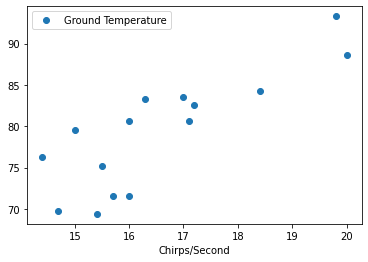

In [ ]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)

# Find the linear regression equation for this data.

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([75.42413074, 77.16154437, 76.11909619, 90.3658879 , 73.68671712,
       71.60182077])

# Chart the original data and the equation on the chart.

In [ ]:
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_1

,Actual,Predicted
0,75.2,75.424131
1,71.6,77.161544
2,71.6,76.119096
3,93.3,90.365888
4,79.6,73.686717
5,76.3,71.601821


# Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics 
print("R2_Score is",metrics.r2_score(y_test,y_pred))

R2_Score is 0.6445140096604121


# If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
c = regressor.intercept_
m = regressor.coef_
x = (95-c) / m
x

array([21.13362374])

# With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
regressor.predict([[18]])

array([84.11119886])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df_2 = pd.read_fwf("brain_body.txt")
df_2.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df_2.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


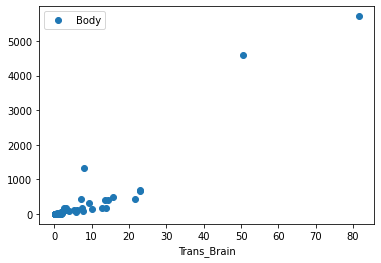

In [ ]:
import math
df_2["Trans_Brain"] = [math.sqrt(i) for i in df_2["Brain"]]
df_2.plot(x='Trans_Brain', y='Body', style='o')
plt.show()

In [ ]:
X_2 = df_2.iloc[:, -1].values 
y_2 = df_2.iloc[:, -2].values 
print(X,y)

[1.83983695e+00 6.92820323e-01 1.16189500e+00 2.15638587e+01
 6.02743727e+00 5.25927752e+00 3.85097390e+00 1.01980390e+00
 2.04694895e+00 6.51920241e-01 3.17804972e-01 9.59166305e-01
 1.00000000e+00 7.07106781e-02 2.44948974e-01 1.87082869e+00
 1.41421356e+00 1.30384048e+00 5.04678115e+01 1.51657509e-01
 1.36784502e+01 2.28254244e+01 8.86002257e-01 3.16227766e+00
 1.81659021e+00 4.47213595e-01 1.18743421e+00 2.30000000e+01
 1.43874946e+01 9.21954446e+00 8.66025404e-01 7.87400787e+00
 8.15720540e+01 1.87082869e+00 2.60768096e+00 5.91607978e+00
 2.01246118e+00 3.46410162e-01 1.51657509e-01 1.00000000e-01
 1.18321596e+00 1.58113883e+01 1.58113883e+00 7.44983221e+00
 1.00000000e+01 7.22218803e+00 3.24807635e+00 7.41619849e-01
 7.74596669e+00 1.89736660e+00 2.07074866e+00 5.29150262e-01
 2.73861279e-01 3.49284984e-01 2.19089023e-01 1.38564065e+01
 1.73205081e+00 1.26491106e+01 9.48683298e-01 1.27279221e+00
 3.22490310e-01 2.05791156e+00] [4.450e+01 1.550e+01 8.100e+00 4.230e+02 1.195e+02 1.

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.45, random_state = 5)

Find the linear regression equation for this data for brain weight to body weight.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
y_predic = regressor.predict(X_test.reshape(-1,1))
y_predic

array([ -45.00049671, -141.52562204,  -66.18749943, 1042.26286166,
        -75.40382595,  800.64878202,   82.36199921, -131.6381457 ,
         75.80654311, 6066.71183038,  435.80667006,  933.47014632,
        -22.86671935, -139.3400402 ,  386.00432263, 1481.78082279,
       1578.17085704,  128.42643506, -139.12038917,  -77.03285506,
       -154.22013233,   33.43253767,  -27.01081485,  538.61250121,
        294.71929387,  -93.32331264,  -25.23464605,  -75.08153006])

Chart the original data and the equation on the chart.

In [ ]:
df_2_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predic})
df_2_1

,Actual,Predicted
0,12.1,-45.000497
1,4.0,-141.525622
2,6.3,-66.187499
3,490.0,1042.262862
4,12.5,-75.403826
5,169.0,800.648782
6,179.5,82.361999
7,5.0,-131.638146
8,115.0,75.806543
9,5712.0,6066.711830


Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics 
print('R2_Score is:', metrics.r2_score(y_test,y_predic))

R2_Score is: 0.8696211441932747


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df_3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df_3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df_3.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df_3.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


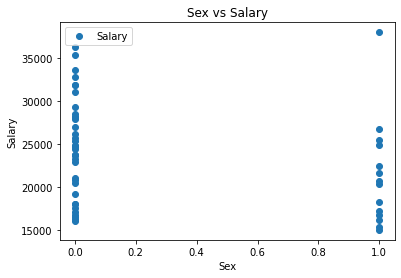

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df_3.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df_3[['Sex','Salary']].corr()

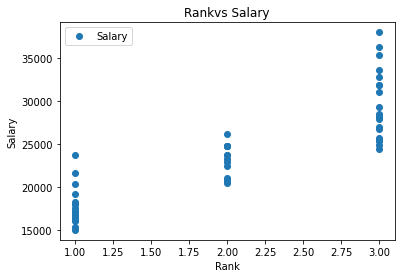

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df_3.plot(x='Rank', y='Salary', style='o')
plt.title('Rankvs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df_3[['Rank','Salary']].corr()

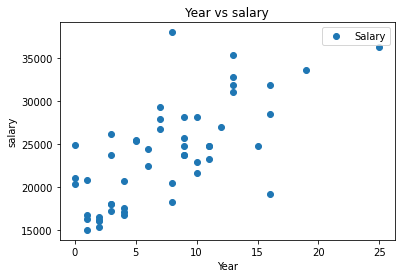

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df_3.plot(x='Year', y='Salary', style='o')
plt.title('Year vs salary')
plt.xlabel('Year')
plt.ylabel('salary')
plt.show()
df_3[['Year','Salary']].corr()

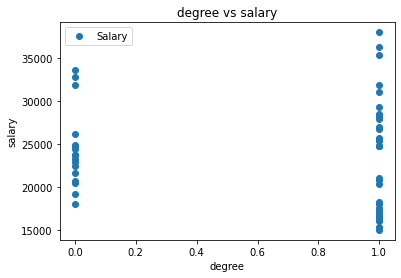

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df_3.plot(x='Degree', y='Salary', style='o')
plt.title('degree vs salary')
plt.xlabel('degree')
plt.ylabel('salary')
plt.show()
df_3[['Degree','Salary']].corr()

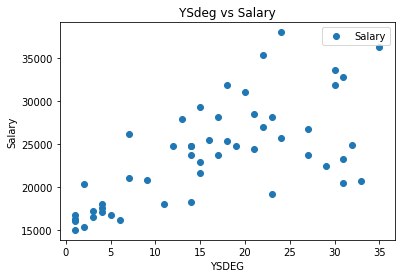

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df_3.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSDEG')
plt.ylabel('Salary')
plt.show()
df_3[['YSdeg','Salary']].corr()

In [ ]:
X_3 = df_3[["Sex", "Rank", "Year","Degree","YSdeg"]].values
y_3 = df_3.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.4, random_state = 5)

# Find the linear regression equation for this data using columns 1-5 to column 6.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,["Sex", "Rank", "Year","Degree",'YSdeg'], columns=['Coefficient'])
y_predic_3 = regressor.predict(X_test)
coeff_df

,Coefficient
Sex,1452.679842
Rank,5275.651443
Year,339.982118
Degree,-1011.886739
YSdeg,25.653297


In [ ]:
regressor.intercept_ 

10752.154606157228

In [ ]:
df_3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df_3_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predic_3})
df_3_1

,Actual,Predicted
0,22450,25539.975661
1,23725,22759.509899
2,16094,15721.536843
3,24450,29157.720884
4,23300,25838.513001
5,20525,24818.566649
6,24900,28852.694291
7,20690,24962.624615
8,28200,29557.069210
9,26775,30092.415889


In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True)

In [ ]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_predic_3))

0.7643758733362576
